### Creation of Dataset to check for overfitting or underfitting

Create a dataset from a second divide of the OULAD data to identify if results display the same characteristics as selected dataset

In [1]:
# Importing the libraries

# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# libraries for calculations & analysis
import numpy as np
import pandas as pd
import statistics
import pylab
from scipy import stats


In [2]:
# read in file - studentInfo.csv
file_path = r"C:\Users\sinea\OneDrive\Documents OneDrive\06 - CCT Masters in DA\Capstone - 2023\uci-open-university-learning-analytics-dataset\studentInfo.csv"

studentInfo_df = pd.read_csv(file_path)

#print(studentInfo_df.head(3))

In [3]:
studentInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [4]:
# drop duplicate rows from the DataFrame

studentInfo_df.drop_duplicates(inplace=True)

In [5]:
# check for numm values

print(studentInfo_df.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [6]:
# drop any rows that have null or NaN values, and count the remaining rows

studentInfo_df = studentInfo_df.dropna()
studentInfo_df.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                32593
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

### Filter the dataset on a course and semester

Course AAA was previously selected for analysis

In [7]:
# filter on course GGG
filtered_df_test = studentInfo_df[studentInfo_df['code_module'] == 'GGG']

In [8]:
#filtered_df_test.info()

In [9]:
unique_values_count = filtered_df_test.code_presentation.value_counts()

print(unique_values_count)

2013J    952
2014B    833
2014J    749
Name: code_presentation, dtype: int64


In [10]:
# filter on semester - 2014J

filtered_df_test2 = filtered_df_test[studentInfo_df['code_presentation'] == '2014J']

C:\Users\sinea\AppData\Local\Temp\ipykernel_11768\2564685082.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_test2 = filtered_df_test[studentInfo_df['code_presentation'] == '2014J']


In [11]:
filtered_df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 31844 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           749 non-null    object
 1   code_presentation     749 non-null    object
 2   id_student            749 non-null    int64 
 3   gender                749 non-null    object
 4   region                749 non-null    object
 5   highest_education     749 non-null    object
 6   imd_band              749 non-null    object
 7   age_band              749 non-null    object
 8   num_of_prev_attempts  749 non-null    int64 
 9   studied_credits       749 non-null    int64 
 10  disability            749 non-null    object
 11  final_result          749 non-null    object
dtypes: int64(3), object(9)
memory usage: 76.1+ KB


### Add / Drop Columns

In [12]:
# drop excess columns
filtered_df_test2 = filtered_df_test2.drop(['region', 'disability', 'imd_band'], axis=1)

In [13]:
# drop excess columns
filtered_df_test2 = filtered_df_test2.drop(['code_module', 'code_presentation', 'num_of_prev_attempts'], axis=1)

In [14]:
filtered_df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 31844 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         749 non-null    int64 
 1   gender             749 non-null    object
 2   highest_education  749 non-null    object
 3   age_band           749 non-null    object
 4   studied_credits    749 non-null    int64 
 5   final_result       749 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.0+ KB


In [15]:
# add a column for tenure using randomint & numbers between 0 and 20 

# set the seed for random 
np.random.seed(42)

filtered_df_test2['tenure'] = np.random.randint(0, 20, filtered_df_test2.shape[0])

In [16]:
# group the tenure column into bands
#bins = [0, 5, 10, 15, float('inf')]  # float('inf') represents positive infinity

#labels = ['0-5', '5-10', '11-15', '16 or more']

In [17]:
# pd.cut() to create a new column with the corresponding bins

#filtered_df_test2['tenure_band'] = pd.cut(filtered_df_test2['tenure'], bins=bins, labels=labels, right=False)

#filtered_df_test2.info()

In [19]:
#unique_values_tenure= filtered_df_test2.tenure_band.unique()

#print(unique_values_tenure)

In [21]:
#unique_counts_tenure= filtered_df_test2.tenure_band.value_counts()

#print(unique_counts_tenure)

In [22]:
# interger coding of gender column
filtered_df_test2['gender'] = filtered_df_test2['gender'].map({'M':0,'F':1})

In [23]:
filtered_df_test2.head()

,id_student,gender,highest_education,age_band,studied_credits,final_result,tenure
31844,31205,0,Lower Than A Level,35-55,30,Fail,6
31845,52702,1,Lower Than A Level,35-55,30,Pass,19
31846,60162,1,A Level or Equivalent,35-55,30,Pass,14
31847,63949,1,Lower Than A Level,0-35,30,Pass,10
31848,91041,1,Lower Than A Level,0-35,30,Withdrawn,7


In [24]:
filtered_df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 31844 to 32592
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         749 non-null    int64 
 1   gender             749 non-null    int64 
 2   highest_education  749 non-null    object
 3   age_band           749 non-null    object
 4   studied_credits    749 non-null    int64 
 5   final_result       749 non-null    object
 6   tenure             749 non-null    int32 
dtypes: int32(1), int64(3), object(3)
memory usage: 43.9+ KB


### Save dataframe to new file

In [25]:
# save dataframe to CSV

#filtered_df_test2.to_csv('test_data2.csv', index=False)

### Distribution check

,id_student,gender,studied_credits,tenure
id_student,1.000000,0.037618,-0.021692,0.044232
gender,0.037618,1.000000,-0.028522,0.012856
studied_credits,-0.021692,-0.028522,1.000000,0.019695
tenure,0.044232,0.012856,0.019695,1.000000


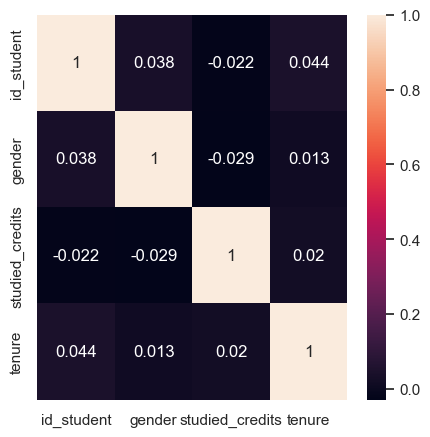

In [26]:
# heatmap of variables to check for correlation

plt.figure(figsize=(5,5))
filtered_df_test2_corr = filtered_df_test2.corr()
sns.heatmap(filtered_df_test2_corr, annot=True);

filtered_df_test2_corr

<function matplotlib.pyplot.show(close=None, block=None)>

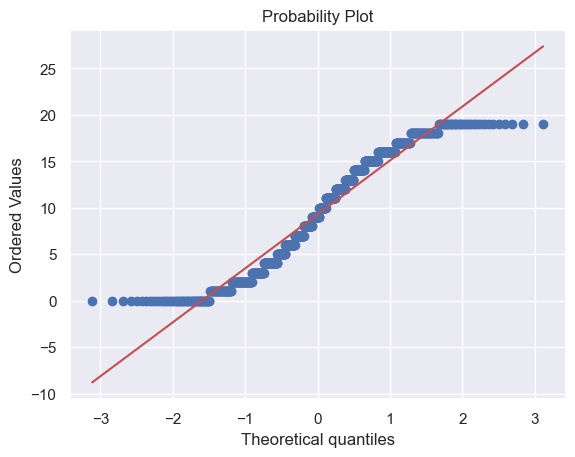

In [27]:
# check the normal distribution of the variables

stats.probplot(filtered_df_test2['tenure'], dist='norm', plot=pylab);
pylab.show

### Encoding categorical data

Using One-Hot Encoding

In [28]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

#data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])
data_df_encoded = pd.get_dummies(filtered_df_test2, columns=['highest_education', 'age_band', 'final_result'])

In [29]:
data_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 31844 to 32592
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   id_student                                     749 non-null    int64
 1   gender                                         749 non-null    int64
 2   studied_credits                                749 non-null    int64
 3   tenure                                         749 non-null    int32
 4   highest_education_A Level or Equivalent        749 non-null    uint8
 5   highest_education_HE Qualification             749 non-null    uint8
 6   highest_education_Lower Than A Level           749 non-null    uint8
 7   highest_education_No Formal quals              749 non-null    uint8
 8   highest_education_Post Graduate Qualification  749 non-null    uint8
 9   age_band_0-35                                  749 non-null    uint8
 

In [30]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'highest_education_No Formal quals',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
#    'tenure_band_0-5',
#    'tenure_band_11-15',
#    'tenure_band_16 or more',
#    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [31]:
data_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 31844 to 32592
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   id_student                                     749 non-null    int64
 1   gender                                         749 non-null    int64
 2   studied_credits                                749 non-null    int64
 3   tenure                                         749 non-null    int32
 4   highest_education_A Level or Equivalent        749 non-null    int64
 5   highest_education_HE Qualification             749 non-null    int64
 6   highest_education_Lower Than A Level           749 non-null    int64
 7   highest_education_No Formal quals              749 non-null    int64
 8   highest_education_Post Graduate Qualification  749 non-null    int64
 9   age_band_0-35                                  749 non-null    int64
 

### Save to new file

In [32]:
# save dataframe to CSV

data_df_encoded.to_csv('test_data.csv', index=False)